## Concession Baseball Stand Orders

Suppose you're a data analyst measuring the order trends happening at the stands and wanted to investigate more details related to the concession business operations.

Analyze the following parts

- Which food stands that they likely to prefer more (using circle or bar graphs)?
- Percentage of those who paid by specific credit card transactions?

### Part I: Testing the Dataframe Contents

In [1]:
#Set the dataframe into PANDAS mode
import pandas as pd
#get the dataset by directing to the name of the file
concession_data = pd.read_csv("/Users/neilvu/Documents/Data Analyst/Projects/Hands-On Projects/Concession Stands (Fictional)/Concession Stands Data of July 4th Baseball.csv")
#read the file (total 100)
concession_data

,Order Number,Customer Name,Concession Item,Quantity,Total Cost,Payment Method,Payment Type
0,1111,Customer A1,Hot Dog,1,1.75,Cash,-
1,1112,Customer A2,"Ice Cream (Vanilla), Ice Cream (Strawberry)",3,6.00,Cash,-
2,1113,Customer A3,Chicken Sandwich,2,9.50,Credit Card,MasterCard
3,1114,Customer A4,Chicken Sandwich,1,4.75,Cash,-
4,1115,Customer A5,Hot Dog,4,7.00,Credit Card,Visa
...,...,...,...,...,...,...,...
95,1246,Customer B46,"Popcorn, Ice Cream (Vanilla)",2,9.00,Credit Card,MasterCard
96,1247,Customer B47,Water Bottle,2,4.20,Cash,-
97,1248,Customer B48,"Chicken Sandwich, Fries, Soda",2,17.30,Credit Card,MasterCard
98,1249,Customer B49,"Pepperoni Pizza (Slice), Soda",2,9.90,Credit Card,MasterCard


#### 1 ).Checking the specific contents, such as by rows, columns, and statistical description

In [9]:
#column index
concession_data.columns

Index(['Order Number', 'Customer Name', 'Concession Item', 'Quantity',
       'Total Cost', 'Payment Method', 'Payment Type'],
      dtype='object')

In [14]:
#be more specifc with the columns itself
concession_data.dtypes

Order Number         int64
Customer Name       object
Concession Item     object
Quantity             int64
Total Cost         float64
Payment Method      object
Payment Type        object
dtype: object

Measuring the standard deviation

In [26]:
#Mode (overall same item) 
concession_data['Concession Item'].mode()

0    Hot Dog, Soda
Name: Concession Item, dtype: object

In [27]:
#Mean (total cost)
concession_data['Total Cost'].mean()

16.6858

In [28]:
#mean (with int)
int(concession_data['Quantity'].mean())

3

In [31]:
#how much it costs in relation to the quanitty ordered
concession_data['Total Cost'].value_counts()

Total Cost
12.80    4
9.00     3
19.00    3
12.00    3
14.85    3
        ..
21.00    1
20.40    1
20.10    1
16.35    1
4.20     1
Name: count, Length: 70, dtype: int64

In [35]:
#overall quantity
concession_data['Quantity'].value_counts()

Quantity
3    37
4    25
2    23
5     7
1     6
6     2
Name: count, dtype: int64

Describing the contents

In [40]:
concession_data['Quantity'].describe()

count    100.000000
mean       3.100000
std        1.087115
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: Quantity, dtype: float64

In [41]:
concession_data['Total Cost'].describe()

count    100.000000
mean      16.685800
std        9.686721
min        1.750000
25%        9.750000
50%       14.850000
75%       20.962500
max       47.850000
Name: Total Cost, dtype: float64

In [42]:
concession_data['Concession Item'].describe()

count               100
unique               48
top       Hot Dog, Soda
freq                  8
Name: Concession Item, dtype: object

#### 2). Getting the contents

Start by getting the idea about Value Counts

In [47]:
#overal type
concession_data['Concession Item'].value_counts()

Concession Item
Hot Dog, Soda                                         8
Chicken Sandwich, Fries, Soda                         7
Popcorn, Soda                                         6
Chicken Sandwich, Fries, Popcorn, Soda                5
Pepperoni Pizza (Slice), Soda                         4
Hot Dog, Fries, Soda                                  4
Whole Pepperoni, Lemonade                             3
Hot Dog, Lemonade                                     3
Hot Dog, Popcorn, Soda                                3
Cheese Pizza (Slice), Water Bottle                    3
Hot Dog, Ice Cream (Strawberry)                       3
Hot Dog                                               3
Chicken Sandwich                                      3
Hot Dog, Ice Cream (Chocolate)                        2
Water Bottle                                          2
Popcorn, Ice Cream (Vanilla)                          2
Popcorn, Ice Cream (Strawberry)                       2
Ice Cream (Vanilla)             

In [44]:
concession_data[concession_data['Concession Item'] == 'Hot Dog']

,Order Number,Customer Name,Concession Item,Quantity,Total Cost,Payment Method,Payment Type
0,1111,Customer A1,Hot Dog,1,1.75,Cash,-
4,1115,Customer A5,Hot Dog,4,7.00,Credit Card,Visa
90,1241,Customer B41,Hot Dog,3,5.25,Credit Card,MasterCard


In [82]:
#finding the particular person with the order - in the event that we need to verify in the order
concession_data[concession_data['Customer Name'] == 'Customer A3']

,Order Number,Customer Name,Concession Item,Quantity,Total Cost,Payment Method,Payment Type
2,1113,Customer A3,Chicken Sandwich,2,9.5,Credit Card,MasterCard


In [45]:
concession_data[concession_data['Concession Item'] == 'Hot Dog, Soda']

,Order Number,Customer Name,Concession Item,Quantity,Total Cost,Payment Method,Payment Type
12,1123,Customer A13,"Hot Dog, Soda",3,10.35,Credit Card,Visa
13,1124,Customer A14,"Hot Dog, Soda",6,20.70,Credit Card,Discover
17,1127,Customer A18,"Hot Dog, Soda",4,13.80,Cash,-
28,1138,Customer A29,"Hot Dog, Soda",3,10.35,Credit Card,Visa
36,1145,Customer A37,"Hot Dog, Soda",2,6.90,Credit Card,Discover
37,1146,Customer A38,"Hot Dog, Soda",4,12.80,Credit Card,Visa
49,1158,Customer A50,"Hot Dog, Soda",2,6.90,Cash,-
91,1242,Customer B42,"Hot Dog, Soda",1,3.45,Cash,-


In [46]:
concession_data[concession_data['Concession Item'] == 'Chicken Sandwich, Fries, Popcorn, Soda']

,Order Number,Customer Name,Concession Item,Quantity,Total Cost,Payment Method,Payment Type
10,1121,Customer A11,"Chicken Sandwich, Fries, Popcorn, Soda",3,30.45,Credit Card,Visa
43,1152,Customer A44,"Chicken Sandwich, Fries, Popcorn, Soda",4,40.60,Credit Card,MasterCard
64,1215,Customer B15,"Chicken Sandwich, Fries, Popcorn, Soda",3,30.45,Credit Card,MasterCard
81,1232,Customer B32,"Chicken Sandwich, Fries, Popcorn, Soda",2,20.30,Credit Card,Discover
92,1243,Customer B43,"Chicken Sandwich, Fries, Popcorn, Soda",2,20.30,Credit Card,MasterCard


In [48]:
concession_data[concession_data['Concession Item'] == 'Chicken Sandwich']

,Order Number,Customer Name,Concession Item,Quantity,Total Cost,Payment Method,Payment Type
2,1113,Customer A3,Chicken Sandwich,2,9.50,Credit Card,MasterCard
3,1114,Customer A4,Chicken Sandwich,1,4.75,Cash,-
23,1133,Customer A24,Chicken Sandwich,1,4.75,Cash,-


In [51]:
concession_data[concession_data['Payment Type'] == 'MasterCard']

,Order Number,Customer Name,Concession Item,Quantity,Total Cost,Payment Method,Payment Type
2,1113,Customer A3,Chicken Sandwich,2,9.50,Credit Card,MasterCard
8,1119,Customer A9,"Hot Dog, Cheese Pizza (Slice), Soda",5,33.00,Credit Card,MasterCard
18,1128,Customer A19,"Whole Meatball, Soda",6,20.95,Credit Card,MasterCard
19,1129,Customer A20,"Cheese Pizza (Slice), Water Bottle",2,10.50,Credit Card,MasterCard
27,1137,Customer A28,"Pepperoni Pizza (Slice), Water Bottle",2,10.70,Credit Card,MasterCard
30,1140,Customer A31,"Hot Dog, Ice Cream (Vanilla)",3,14.25,Credit Card,MasterCard
31,1141,Customer A32,"Hot Dog, Fries, Soda",3,16.95,Credit Card,MasterCard
34,1144,Customer A35,"Hot Dog, Fries, Soda",3,16.95,Credit Card,MasterCard
38,1147,Customer A39,"Popcorn, Ice Cream (Strawberry)",3,13.50,Credit Card,MasterCard
40,1149,Customer A41,"Pepperoni Pizza (Slice), Soda",1,4.95,Credit Card,MasterCard


Cost is more than 10 bucks for more than 2 customers (with head count of 10)

In [57]:
concession_data[(concession_data["Quantity"] >= 2) & (concession_data['Total Cost'] >= 10)].head(10)

,Order Number,Customer Name,Concession Item,Quantity,Total Cost,Payment Method,Payment Type
5,1116,Customer A6,Supreme Pizza (Whole),4,11.25,Credit Card,Visa
8,1119,Customer A9,"Hot Dog, Cheese Pizza (Slice), Soda",5,33.00,Credit Card,MasterCard
9,1120,Customer A10,"Chicken Sandwich, Fries, Soda",2,13.90,Credit Card,Discover
10,1121,Customer A11,"Chicken Sandwich, Fries, Popcorn, Soda",3,30.45,Credit Card,Visa
11,1122,Customer A12,"Hot Dog, Ice Cream (Chocolate)",5,23.75,Credit Card,Visa
12,1123,Customer A13,"Hot Dog, Soda",3,10.35,Credit Card,Visa
13,1124,Customer A14,"Hot Dog, Soda",6,20.70,Credit Card,Discover
14,1124,Customer A15,"Whole Pepperoni, Lemonade",4,21.25,Credit Card,Visa
15,1125,Customer A16,"Hot Dog, Ice Cream (Strawberry)",3,14.75,Cash,-
16,1126,Customer A17,"Hot Dog, Fries, Soda",5,28.25,Credit Card,Discover


save it to a csv file with filtered values

In [69]:
#set the filter value that you wish to input
more_than_two = concession_data[(concession_data["Quantity"] >= 2) & (concession_data['Total Cost'] >= 10)]
#rest the index
more_than_two = more_than_two.reset_index()
#download it to a new file for eval
more_than_two.to_csv('Customers With Two or More Orders and Total Cost Greater Than or Equal To $10.00.csv')
#here's the new dataset frame
more_than_two

,index,Order Number,Customer Name,Concession Item,Quantity,Total Cost,Payment Method,Payment Type
0,5,1116,Customer A6,Supreme Pizza (Whole),4,11.25,Credit Card,Visa
1,8,1119,Customer A9,"Hot Dog, Cheese Pizza (Slice), Soda",5,33.00,Credit Card,MasterCard
2,9,1120,Customer A10,"Chicken Sandwich, Fries, Soda",2,13.90,Credit Card,Discover
3,10,1121,Customer A11,"Chicken Sandwich, Fries, Popcorn, Soda",3,30.45,Credit Card,Visa
4,11,1122,Customer A12,"Hot Dog, Ice Cream (Chocolate)",5,23.75,Credit Card,Visa
...,...,...,...,...,...,...,...,...
67,92,1243,Customer B43,"Chicken Sandwich, Fries, Popcorn, Soda",2,20.30,Credit Card,MasterCard
68,93,1244,Customer B44,"Chicken Sandwich, Fries, Water Bottle",2,18.10,Credit Card,Visa
69,94,1245,Customer B45,"Popcorn, Ice Cream (Strawberry)",3,13.50,Credit Card,Visa
70,97,1248,Customer B48,"Chicken Sandwich, Fries, Soda",2,17.30,Credit Card,MasterCard


### Part II: Analyzing the Data Contents 

Analyze the data contents by filtering the data contents using the subparts below.

This section explains the trends that people prefer on their concession foods.

Contents...

- ##### Subpart A: Ranking the Top 5 Favorite Order Item that Customers Buy

- ##### Subpart B: Credit Card Brand Preference at the Concession Stand (e.g: Visa, MasterCard, Discover)

- ##### Subpart C: Overall Spending Effect on these Customers Orders


As a token for this project, this helps analyze business trends in what ways the baseball commitee can do to improve performance operations at the simulated baseball game.

Compare this by testing it out with Power BI and Tableau to see the similarities and differences.

#### Reference Tool for Order

In [122]:
#refer back to the value_counts we discused this morning
concession_data['Concession Item'].value_counts()

Concession Item
Hot Dog, Soda                                         8
Chicken Sandwich, Fries, Soda                         7
Popcorn, Soda                                         6
Chicken Sandwich, Fries, Popcorn, Soda                5
Pepperoni Pizza (Slice), Soda                         4
Hot Dog, Fries, Soda                                  4
Whole Pepperoni, Lemonade                             3
Hot Dog, Lemonade                                     3
Hot Dog, Popcorn, Soda                                3
Cheese Pizza (Slice), Water Bottle                    3
Hot Dog, Ice Cream (Strawberry)                       3
Hot Dog                                               3
Chicken Sandwich                                      3
Hot Dog, Ice Cream (Chocolate)                        2
Water Bottle                                          2
Popcorn, Ice Cream (Vanilla)                          2
Popcorn, Ice Cream (Strawberry)                       2
Ice Cream (Vanilla)             

#### Subpart A: Ranking the Top 5 Favorite Order Item that Customers Buy

Analyze which customers prefer their top 5 favorite order from the concession menu

##### Explaination 1: Using Pie Chart to Analyze Percentages 
by overall...

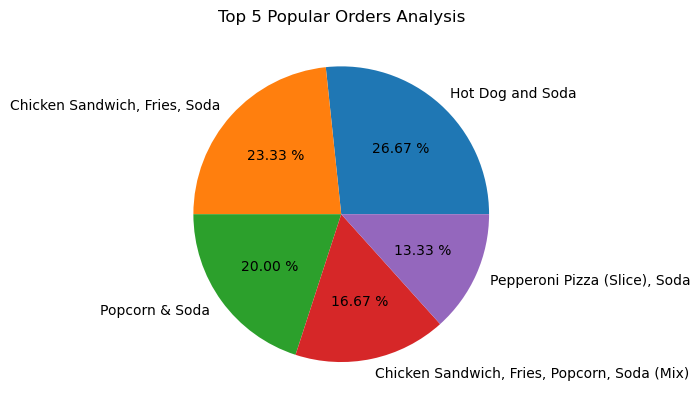

<module 'matplotlib.pyplot' from '/Users/neilvu/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

In [2]:
#mathplotlib
import matplotlib.pyplot as plt
#numpy
import numpy as np
#pandas
import pandas as pd


def rank_top_5_popular_order(rank_1, rank_2, rank_3, rank_4, rank_5):
    #List the top 5 Frequent Concession Items that Customers Ordered.
    labels = ['Hot Dog and Soda', 'Chicken Sandwich, Fries, Soda', 'Popcorn & Soda', 'Chicken Sandwich, Fries, Popcorn, Soda (Mix)', 'Pepperoni Pizza (Slice), Soda']
    #make a graph
    plt.pie([rank_1, rank_2, rank_3, rank_4, rank_5], labels = labels, autopct = '%.2f %%')
    #name of the title
    plt.title('Top 5 Popular Orders Analysis')
    #show me the graph
    plt.show()
    #save and export
    plt.savefig("/Users/neilvu/Documents/Data Analyst/Projects/Hands-On Projects/Concession Stands (Fictional)/Popular Menu List Analysis.pdf")
    #return with this reuslt plt
    return plt


#specifc the rank of these popular orders found in this dataframe
hot_dog = concession_data.loc[concession_data['Concession Item'] == "Hot Dog, Soda"].value_counts().count() #First Place
chicken_sandwich = concession_data.loc[concession_data['Concession Item'] == 'Chicken Sandwich, Fries, Soda'].value_counts().count() #Second Place
popcorn = concession_data.loc[concession_data['Concession Item'] == "Popcorn, Soda"].value_counts().count() #Third Place
chicken_sandwich_mix = concession_data.loc[concession_data['Concession Item'] == "Chicken Sandwich, Fries, Popcorn, Soda"].value_counts().count() #Fourth Place
pizza = concession_data.loc[concession_data['Concession Item'] == 'Pepperoni Pizza (Slice), Soda'].value_counts().count() #Fifth Place
rank_top_5_popular_order(hot_dog, chicken_sandwich, popcorn, chicken_sandwich_mix, pizza)

##### What does this mean from this circle graph?

Out of the percentage in the top 5 orders, the majority had stated that purchasing hot dog and soda was one of the popular concession orders in the July 4th baseball. This shows that because hot dog is a baseball tradition, people choose more of that item as their favorite choice. Therefore, when combining with soda, it makes into a great meal deal, which the majority of customers had enjoyed their baseball meal.

##### Explaination 2: Using Bar Graph to Analyze Customer Trends 
By overall, but more specifcially to customer trends of how many of those who ordered these item...

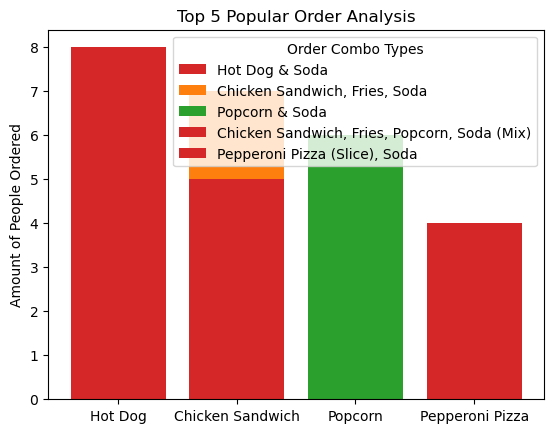

<module 'matplotlib.pyplot' from '/Users/neilvu/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

In [4]:
#mathplotlib
import matplotlib.pyplot as plt

def top_5_combo_orders (set_1, set_2, label, color):
    
    #include the figure axis
    fig, ax = plt.subplots()

    #include the axis as well the color specification
    ax.bar(set_1, set_2, label=bar_labels, color=bar_colors)

    #Apply the label y-axis
    ax.set_ylabel('Amount of People Ordered')
    #Apply the title
    ax.set_title('Top 5 Popular Order Analysis')
    #Apply the legend
    ax.legend(title = "Order Combo Types")
    
    #show me the graph plot
    plt.show()

    #save and export
    plt.savefig("/Users/neilvu/Documents/Data Analyst/Projects/Hands-On Projects/Concession Stands (Fictional)/Top 5 Popular Order Analysis (Bar Graph).pdf")

    #return this statement
    return plt


#label the axis 
top_5_order_types = ['Hot Dog', 'Chicken Sandwich', 'Popcorn', 'Chicken Sandwich', 'Pepperoni Pizza']
amount_people_ordered = [8,7,6,5,4]
#customize the selected axis
#first part is for the legend labels to specify the meals
bar_labels = ['Hot Dog & Soda', 'Chicken Sandwich, Fries, Soda', 'Popcorn & Soda', 'Chicken Sandwich, Fries, Popcorn, Soda (Mix)', 'Pepperoni Pizza (Slice), Soda']
#second part is to color the labels
bar_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:red']
top_5_combo_orders(top_5_order_types, amount_people_ordered, label=bar_labels, color=bar_colors)

##### What does this mean from this bar graph?

Similarly from the circle graph above, but more specifically to the combo side, we can see that those who ordered just "Hot Dog and Soda" (be mindful of the word "just" since it highlights a specific part of the data value) was one of their favorite orders. The rest of the combo items were counted as there were 30 customers total who ordered the top 5 combo. 

Looking at the orange part, we can see that there were two popular combos who ordered "Chicken Sandwich", except that the difference was that from the circle graph above, even though more customers had chose "Chicken Sandwich, Fries, Soda", that later was combined with "Chicken Sandwich, Fries, Popcorn, and Soda" in the bar graph, because it was set into a single value that matches with this name "Chicken Sandwich". This is the reason when PANDAS has set this orange part as connected from from the red part under the "Chicken Sandwich" axis.

#### Subpart B: Credit Card Brand Preference at the Concession Stand (e.g: Visa, MasterCard, Discover)

When it comes to payment methods, which customers perfer using their credit card brands, given to the fact that credit cards are now more common in today's consumer world.

<module 'matplotlib.pyplot' from '/Users/neilvu/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/matplotlib/pyplot.py'>

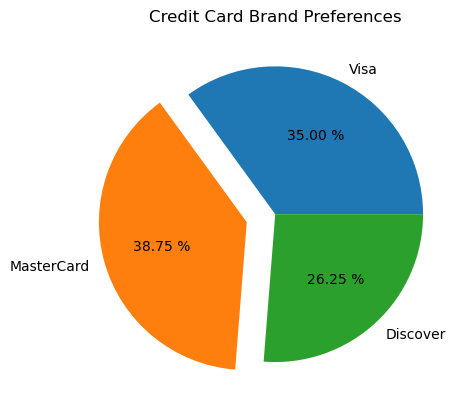

In [138]:
#mathplotlib
import matplotlib.pyplot as plt
#numpy
import numpy as np
#pandas
import pandas as pd

def preferred_credit_card_brands(card_brand_1, card_brand_2, card_brand_3):
    #label the credit card brands
    labels = ['Visa', 'MasterCard', 'Discover']
    #visualize who has the most purchases
    explode = (0, 0.2, 0)
    #make a graph
    plt.pie([card_brand_1, card_brand_2, card_brand_3], labels = labels, autopct = "%.2f %%", explode = explode)
    #title name
    plt.title("Credit Card Brand Preferences")
    #save and export file
    plt.savefig("/Users/neilvu/Documents/Data Analyst/Projects/Hands-On Projects/Concession Stands (Fictional)/Credit Card Brand Preferences.pdf")
    #return with this result
    return plt

#specify the credit card brands
Visa = concession_data.loc[concession_data['Payment Type'] == 'Visa'].value_counts().count()
MasterCard = concession_data.loc[concession_data['Payment Type'] == 'MasterCard'].value_counts().count()
Discover = concession_data.loc[concession_data['Payment Type'] == 'Discover'].value_counts().count()
preferred_credit_card_brands(Visa, MasterCard, Discover)

##### What does this mean from this circle graph?

When analyzing with purchase method trends (more specifically with the credit card brand side), we can see that the majority who ordered at the baseball concession stand has used MasterCard as their preferred payment method. This mostly was used to get the cashback rewards when caterogrizing concession stands as a restaurant, which therefore leads to greater chance of loyalty points to use the rewards to purchase other consumer goods. Since this concession accepts all major credit card brand, we like to say that MasterCard is the leading brand, which tells like all credit card marketing brands - the more you use and pay, the more cashback you get from all consumer retailers, including this stand.

By using this data, we can then make decision to include MasterCard as a loyality points and a possible discount for customers in future games - to increase revenue and service.

#### Subpart C: Overall Spending Effect on these Customers orders

Create a circle graph visualizing which overall has the most spending combined from the orders

<module 'matplotlib.pyplot' from '/Users/neilvu/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/matplotlib/pyplot.py'>

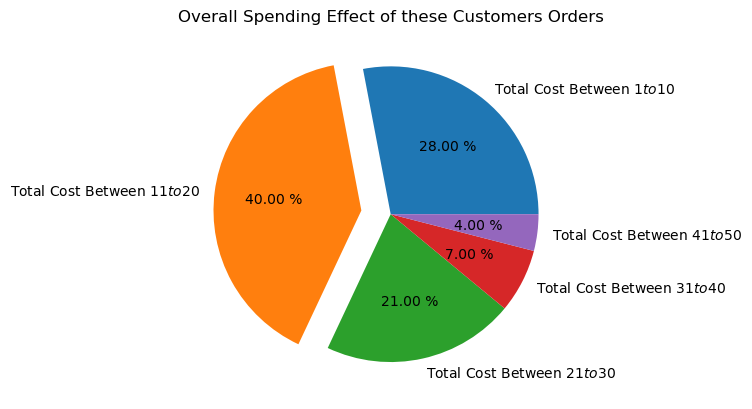

In [135]:
#mathplotlib
import matplotlib.pyplot as plt
#numpy
import numpy as np
#pandas
import pandas as pd

def overall_spending_effect(compare_1, compare_2, compare_3, compare_4, compare_5):
    #make a label
    differences = [compare_1, compare_2, compare_3, compare_4, compare_5]
    #label the differences
    labels = ['Total Cost Between $1 to $10', 'Total Cost Between $11 to $20', 'Total Cost Between $21 to $30', 'Total Cost Between $31 to $40', 'Total Cost Between $41 to $50']
    #visulize which one has the highest amount of orders per total cost
    explode = (0, 0.2, 0, 0, 0)
    #make a pie graph - size it larger
    plt.pie(differences, labels = labels, autopct = "%.2f %%", explode = explode, pctdistance = 0.6) # explode = explode)
    #title
    plt.title("Overall Spending Effect of these Customers Orders")
    #save the file!
    plt.savefig("/Users/neilvu/Documents/Data Analyst/Projects/Hands-On Projects/Concession Stands (Fictional)/Overall Spending Effect of these Customers Orders.pdf")
    #return the result
    return plt


#specify the populated values here per total cost...
Tier_1 = concession_data.loc[(concession_data['Total Cost'] >= 1) & (concession_data['Total Cost'] < 10)].value_counts().count()
Tier_2 = concession_data.loc[(concession_data['Total Cost'] >= 10) & (concession_data['Total Cost'] < 20)].value_counts().count()
Tier_3 = concession_data.loc[(concession_data['Total Cost'] >= 20) & (concession_data['Total Cost'] < 30)].value_counts().count()
Tier_4 = concession_data.loc[(concession_data['Total Cost'] >= 30) & (concession_data['Total Cost'] < 40)].value_counts().count()
Tier_5 = concession_data.loc[(concession_data['Total Cost'] >= 40) & (concession_data['Total Cost'] < 50)].value_counts().count()
overall_spending_effect(Tier_1, Tier_2, Tier_3, Tier_4, Tier_5)

##### What does this mean from this circle graph.

Since concession price cost ranges from $1 to $15.00, the majority who spend the total cost was between $11.00 to $20.00. This is typically the case for those who spent at the concession stands depending on the price of each concession food as well the quantity per customer. Seeing this as a highlight for this overall spending effect, we can tell that it is normal for most of them to pay at that total cost range. This gives an overall idea of who spends the most, the least, and in the between range. 

The mininum and max range can be found when analyzing this report.

In [147]:
##minimum
minimum = concession_data["Total Cost"].min()
print(f"The minimum total cost at the baseball stand was ${minimum}.")

The minimum total cost at the baseball stand was $1.75.


In [146]:
##max
maxinimum = concession_data["Total Cost"].max()
print(f"The max total cost at the baseball stand was ${maxinimum}.")

The max total cost at the baseball stand was $47.85.


#### Comments or reactions from this report?? Let me know what you all think about this report analysis.

In [105]:
concession_data['Total Cost'].max()

47.85

In [102]:
#scratch note

between 1 and 10 dollars

In [103]:
concession_data[(concession_data['Total Cost'] > 1) & (concession_data['Total Cost'] < 10)].value_counts().count()

28

between 11 to 20 dollars

In [111]:
concession_data[(concession_data['Total Cost'] >=10) & (concession_data['Total Cost'] < 20)].value_counts().count()

40

between 21 to 30 dollars

In [104]:
concession_data[(concession_data['Total Cost'] > 21) & (concession_data['Total Cost'] < 30)].value_counts().count()

13

between 30 to 40 dollars

In [109]:
concession_data[(concession_data['Total Cost'] > 30) & (concession_data['Total Cost'] < 40)].value_counts().count()

7

between 40 to 50 dollars

In [108]:
concession_data[(concession_data['Total Cost'] > 40) & (concession_data['Total Cost'] < 50)].value_counts().count()

4

In [110]:
concession_data.loc[(concession_data['Total Cost'] > 1) & (concession_data['Total Cost'] < 10)].value_counts().count()

28

### Debug Errors

1). Make sure that you need to include parathesis, python itself confuses what you wrote in the (____) as arguments, it interprets incorrect with one assumed as a num, the other as a boolean which you want to find both as nums directly.

In [99]:
concession_data[concession_data['Total Cost'] > 10 & concession_data['Total Cost'] < 20].value_counts().count()

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

2). Use value_counts() and count() to implement specifically on the args itself, instead of the usual count []

In [100]:
concession_data[concession_data['Total Cost'] > 0].count()[0]

/var/folders/8v/2t7q220516nf_3hnkh0mq_vh0000gn/T/ipykernel_1534/846886447.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  concession_data[concession_data['Total Cost'] > 0].count()[0]


100

In [101]:
concession_data[concession_data['Total Cost'] > 0].value_counts().count()

100

3). 

TypeError: object of type 'bool' has no len()

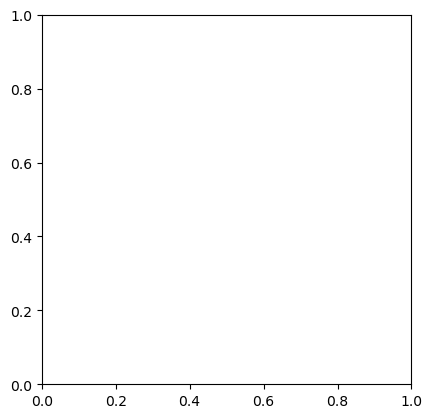

In [125]:
#mathplotlib
import matplotlib.pyplot as plt
#numpy
import numpy as np
#pandas
import pandas as pd

def overall_spending_effect(compare_1, compare_2, compare_3, compare_4, compare_5):
    #make a label
    differences = [compare_1, compare_2, compare_3, compare_4, compare_5]
    #label the differences
    labels = ['Total Cost Between $1 to $10', 'Total Cost Between $11 to $20', 'Total Cost Between $21 to $30', 'Total Cost Between $31 to $40', 'Total Cost Between $41 to $50']
    #visulize which one has the highest amount of orders per total cost
    #explode = (0, 0.2, 0, 0, 0)
    #make a pie graph
    plt.pie(differences, labels == labels, autopct = "%.2f %%", pctdistance = 0) # explode = explode)
    #title
    plt.title("Overall Spending Effect of these Customers Orders")
    return plt


#specify the populated values here per total cost...
Tier_1 = concession_data.loc[(concession_data['Total Cost'] >= 1) & (concession_data['Total Cost'] < 10)].value_counts().count()
Tier_2 = concession_data.loc[(concession_data['Total Cost'] >= 10) & (concession_data['Total Cost'] < 20)].value_counts().count()
Tier_3 = concession_data.loc[(concession_data['Total Cost'] >= 20) & (concession_data['Total Cost'] < 30)].value_counts().count()
Tier_4 = concession_data.loc[(concession_data['Total Cost'] >= 30) & (concession_data['Total Cost'] < 40)].value_counts().count()
Tier_5 = concession_data.loc[(concession_data['Total Cost'] >= 40) & (concession_data['Total Cost'] < 50)].value_counts().count()
overall_spending_effect(Tier_1, Tier_2, Tier_3, Tier_4, Tier_5)

#### Scratch Work

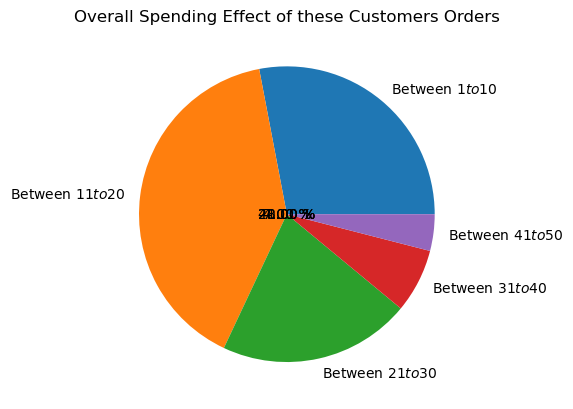

In [134]:
#mathplotlib
import matplotlib.pyplot as plt
#numpy
import numpy as np
#pandas
import pandas as pd

#specify the populated values here per total cost...
Tier_1 = concession_data.loc[(concession_data['Total Cost'] >= 1) & (concession_data['Total Cost'] < 10)].value_counts().count()
Tier_2 = concession_data.loc[(concession_data['Total Cost'] >= 10) & (concession_data['Total Cost'] < 20)].value_counts().count()
Tier_3 = concession_data.loc[(concession_data['Total Cost'] >= 20) & (concession_data['Total Cost'] < 30)].value_counts().count()
Tier_4 = concession_data.loc[(concession_data['Total Cost'] >= 30) & (concession_data['Total Cost'] < 40)].value_counts().count()
Tier_5 = concession_data.loc[(concession_data['Total Cost'] >= 40) & (concession_data['Total Cost'] < 50)].value_counts().count()

#make a label
differences = [Tier_1, Tier_2, Tier_3, Tier_4, Tier_5]
#label the differences
labels = ['Between $1 to $10', 'Between $11 to $20', 'Between $21 to $30', 'Between $31 to $40', 'Between $41 to $50']
#visulize which one has the highest amount of orders per total cost
#explode = (0, 0.2, 0, 0, 0)
#make a pie graph
plt.pie(differences, labels = labels, autopct = "%.2f %%", pctdistance = 0) # explode = explode)
#title
plt.title("Overall Spending Effect of these Customers Orders")

plt.show()

In [50]:
concession_data[concession_data['Total Cost'] > 10]

,Order Number,Customer Name,Concession Item,Quantity,Total Cost,Payment Method,Payment Type
5,1116,Customer A6,Supreme Pizza (Whole),4,11.25,Credit Card,Visa
8,1119,Customer A9,"Hot Dog, Cheese Pizza (Slice), Soda",5,33.00,Credit Card,MasterCard
9,1120,Customer A10,"Chicken Sandwich, Fries, Soda",2,13.90,Credit Card,Discover
10,1121,Customer A11,"Chicken Sandwich, Fries, Popcorn, Soda",3,30.45,Credit Card,Visa
11,1122,Customer A12,"Hot Dog, Ice Cream (Chocolate)",5,23.75,Credit Card,Visa
...,...,...,...,...,...,...,...
92,1243,Customer B43,"Chicken Sandwich, Fries, Popcorn, Soda",2,20.30,Credit Card,MasterCard
93,1244,Customer B44,"Chicken Sandwich, Fries, Water Bottle",2,18.10,Credit Card,Visa
94,1245,Customer B45,"Popcorn, Ice Cream (Strawberry)",3,13.50,Credit Card,Visa
97,1248,Customer B48,"Chicken Sandwich, Fries, Soda",2,17.30,Credit Card,MasterCard


#### Step A. Hot Dogs 

Which Sides of Hot Dogs do they prefer, or would they choose just hot dog itself?

In [140]:
hot_dog = concession_data.loc[concession_data['Concession Item'] == "Hot Dog"].count()
hot_dog

Order Number       3
Customer Name      3
Concession Item    3
Quantity           3
Total Cost         3
Payment Method     3
Payment Type       3
dtype: int64

In [158]:
hot_dog_combo_8 = concession_data.loc[concession_data['Concession Item'] == "Hot Dog, Meatball Pizza (Slice), Soda"].count()[0]
hot_dog_combo_8

/var/folders/8v/2t7q220516nf_3hnkh0mq_vh0000gn/T/ipykernel_41558/4194796921.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hot_dog_combo_8 = concession_data.loc[concession_data['Concession Item'] == "Hot Dog, Meatball Pizza (Slice), Soda"].count()[0]


1

##### Subpart I: Make a Circle Graph regarding this part

/var/folders/8v/2t7q220516nf_3hnkh0mq_vh0000gn/T/ipykernel_1534/98766297.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hot_dog = concession_data.loc[concession_data['Concession Item'] == "Hot Dog"].count()[0]
/var/folders/8v/2t7q220516nf_3hnkh0mq_vh0000gn/T/ipykernel_1534/98766297.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hot_dog_combo_1 = concession_data.loc[concession_data['Concession Item'] == "Hot Dog, Soda"].count()[0]
/var/folders/8v/2t7q220516nf_3hnkh0mq_vh0000gn/T/ipykernel_1534/98766297.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, i

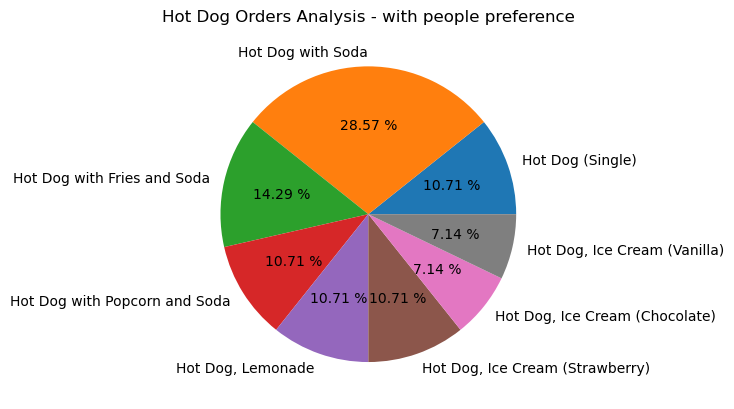

<Figure size 640x480 with 0 Axes>

In [8]:
#### YOU NEED TO ACTIVATE THESE BEFORE DOING SO - otherwise it won't exist and you'll get an error.
#Mathplotlib
import matplotlib.pyplot as plt
#Numbers
import numpy as np
#PANDAS
import pandas as pd

#specify which labels you need to include from this dataframe
hot_dog = concession_data.loc[concession_data['Concession Item'] == "Hot Dog"].count()[0]
hot_dog_combo_1 = concession_data.loc[concession_data['Concession Item'] == "Hot Dog, Soda"].count()[0]
hot_dog_combo_2 = concession_data.loc[concession_data['Concession Item'] == "Hot Dog, Fries, Soda"].count()[0]
hot_dog_combo_3 = concession_data.loc[concession_data['Concession Item'] == "Hot Dog, Popcorn, Soda"].count()[0]
hot_dog_combo_4 = concession_data.loc[concession_data['Concession Item'] == "Hot Dog, Lemonade"].count()[0]
hot_dog_combo_5 = concession_data.loc[concession_data['Concession Item'] == "Hot Dog, Ice Cream (Strawberry)"].count()[0]
hot_dog_combo_6 = concession_data.loc[concession_data['Concession Item'] == "Hot Dog, Ice Cream (Chocolate)"].count()[0]
hot_dog_combo_7 = concession_data.loc[concession_data['Concession Item'] == "Hot Dog, Ice Cream (Vanilla)"].count()[0]
hot_dog_combo_8 = concession_data.loc[concession_data['Concession Item'] == "Hot Dog, Meatball Pizza (Slice), Soda"].count()[0]
#hot_dog_combo_9 = concession_data.loc[concession_data['Concession Item'] == "Hot Dog, Pepperoni  Pizza (Slice), Soda"].count()[0]
#hot_dog_combo_10 = concession_data.loc[concession_data['Concession Item'] == "Hot Dog, Cheese Pizza (Slice), Soda"].count()[0]
#hot_dog_combo_11 = concession_data.loc[concession_data['Concession Item'] == "Hot Dog, Water Bottle"].count()[0]


#insert labels here
### NOTE THAT THERE IS A LIMIT OF VALUES ALLOWED IN THE SLICE OF THE CIRCLE GRAPHS
labels = ["Hot Dog (Single)", "Hot Dog with Soda", "Hot Dog with Fries and Soda", "Hot Dog with Popcorn and Soda", "Hot Dog, Lemonade", "Hot Dog, Ice Cream (Strawberry)", "Hot Dog, Ice Cream (Chocolate)", "Hot Dog, Ice Cream (Vanilla)"]
          #"Hot Dog, Ice Cream (Chocolate)", "Hot Dog, Ice Cream (Vanilla)", "Hot Dog, Meatball Pizza (Slice), Soda", "Hot Dog, Pepperoni  Pizza (Slice), Soda", "Hot Dog, Water Bottle"]
#activate the pie chart
plt.pie([hot_dog, hot_dog_combo_1, hot_dog_combo_2, hot_dog_combo_3, hot_dog_combo_4, hot_dog_combo_5, hot_dog_combo_6, hot_dog_combo_7], labels = labels, autopct = "%.2f %%") #with percentage

#name of the title
plt.title("Hot Dog Orders Analysis - with people preference")

#show me the pie chart
plt.show()

#save and export file
plt.savefig("/Users/neilvu/Documents/Data Analyst/Projects/Hands-On Projects/Concession Stands (Fictional)/Hot Dog Analysis Orders.pdf")


Shows the preference of hot dogs that they prefer.